<a href="https://colab.research.google.com/github/kalaicoder14/github_1/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
df=pd.read_csv("/content/data.csv")

In [4]:
#head
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
#shape
df.shape

(4600, 18)

In [6]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [8]:
df.nunique()

,0
date,70
price,1741
bedrooms,10
bathrooms,26
sqft_living,566
sqft_lot,3113
floors,6
waterfront,2
view,5
condition,5


In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


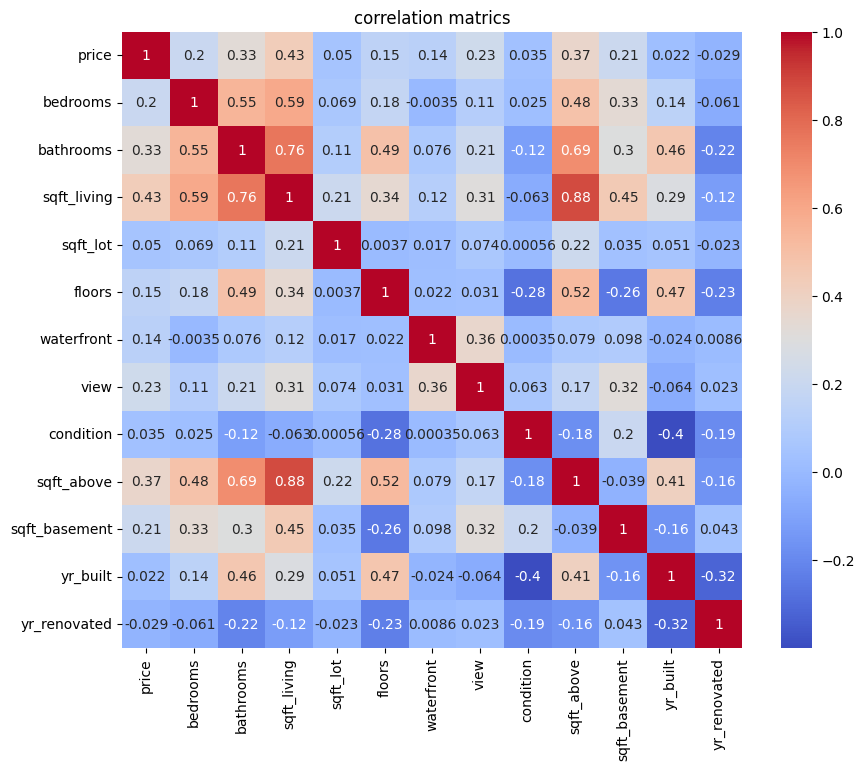

In [10]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_corr = df_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.title("correlation matrics")
plt.show()


In [11]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [12]:
columns_to_remove=['date','yr_renovated','street', 'city','statezip', 'country']
df=df.drop(columns=columns_to_remove)

In [13]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976


In [14]:
import scipy.stats as stats
z_scores=stats.zscore(df)
threshold=3
print("size before removing outliers:",df.shape)
outliers_df=df[(z_scores>threshold).any(axis=1)]
df=df[(z_scores<=threshold).all(axis=1)]
print("size after removing outliers:",df.shape)



size before removing outliers: (4600, 12)
size after removing outliers: (4244, 12)


In [15]:
outliers_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
56,491500.0,4.0,1.75,2190,125452,1.0,0,2,3,2190,0,1968
100,736500.0,4.0,2.50,3180,21904,2.0,0,3,3,3180,0,2000
107,1090000.0,4.0,2.50,4340,141570,2.5,0,0,3,4340,0,1992
118,1030000.0,5.0,2.75,3190,16920,1.0,0,3,3,1690,1500,1976


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
df_scaled=pd.DataFrame(scaler.transform(df),columns=df.columns)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [18]:
x=df.drop("price",axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [19]:
print(f'xtrain shape:{x_train.shape}')
print(f'xtest shape:{x_test.shape}')

xtrain shape:(3183, 11)
xtest shape:(1061, 11)


In [20]:
models=[
    ('random forest',RandomForestRegressor()),
    ('decision tree',DecisionTreeRegressor()),
    ('linear regression',LinearRegression()),
    ('knn',KNeighborsRegressor())
]

In [21]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [22]:
for name,model in models:
  print(name)
  print()
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('mean squared error:',mean_squared_error(y_test,y_pred))
  print('\n')
  print('r2 score:',r2_score(y_test,y_pred))
  print('\n')
  print('mean absolute error:',mean_absolute_error(y_test,y_pred))
  print('\n')





random forest

mean squared error: 44010810273.96115


r2 score: 0.4099123407521895


mean absolute error: 140889.80705847178


decision tree

mean squared error: 73999769787.09982


r2 score: 0.007826698333213145


mean absolute error: 185191.66403945998


linear regression

mean squared error: 41194072741.05998


r2 score: 0.4476785633497429


mean absolute error: 139590.9560074879


knn

mean squared error: 54270710864.73361


r2 score: 0.2723497581494757


mean absolute error: 155957.7490738805




In [23]:
sample_data = pd.DataFrame([{
    "bedrooms": 3,
    "bathrooms": 2,
    "sqft_living": 1800,
    "sqft_lot": 5000,
    "floors": 1.0,
    "waterfront": 0,
    "view": 0,
    "condition": 3,
    "sqft_above": 1500,
    "sqft_basement": 300,
    "yr_built": 2000
   }])
predicted_price = model.predict(sample_data)
print(" Predicted Price:", predicted_price[0])


 Predicted Price: 587990.0
